In [31]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

In [6]:
# read the train and test data into Pandas dataframes
train = pd.read_csv("train.tsv", sep="\t")
test = pd.read_csv("test.tsv", sep="\t")

In [7]:
train.isnull().sum()

train_id                0
name                    0
item_condition_id       0
category_name         115
brand_name           9939
price                   0
shipping                0
item_description        0
dtype: int64

In [8]:
train=train.fillna(train.mean())

<ipython-input-8-fbc4cff497aa>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train=train.fillna(train.mean())


In [12]:
train.columns

Index(['train_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'price', 'shipping', 'item_description'],
      dtype='object')

In [13]:
numerical_columns = ["shipping", "item_condition_id"]
categorical_columns = ["name", "category_name", "brand_name", "item_description"]

In [14]:
for col in categorical_columns:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col].astype(str))

In [15]:
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,11760,3,437,1095,10.0,1,13516
1,1,16579,3,66,814,52.0,0,18228
2,2,1599,1,733,945,10.0,1,1979
3,3,10264,1,209,1095,35.0,1,13121
4,4,798,1,670,1095,44.0,0,6205


In [16]:
train.isnull().sum()

train_id             0
name                 0
item_condition_id    0
category_name        0
brand_name           0
price                0
shipping             0
item_description     0
dtype: int64

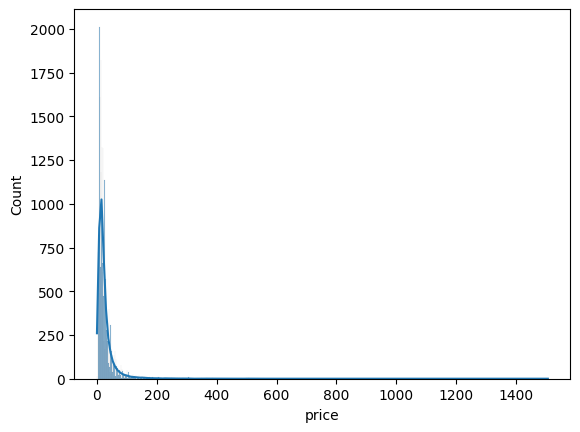

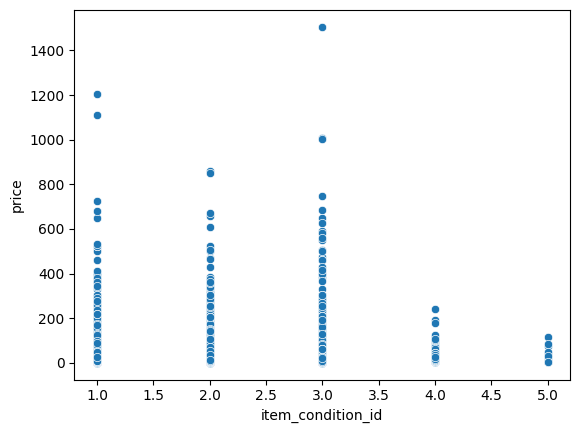

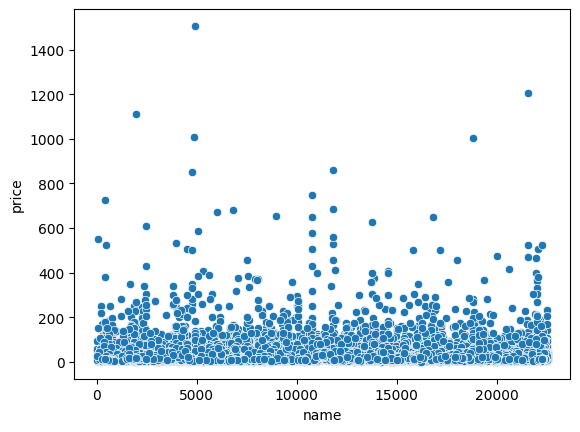

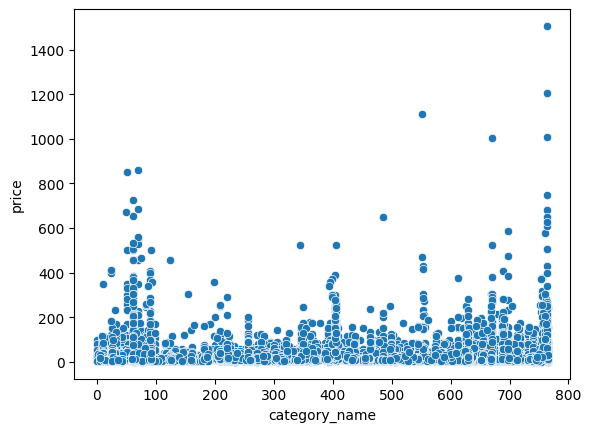

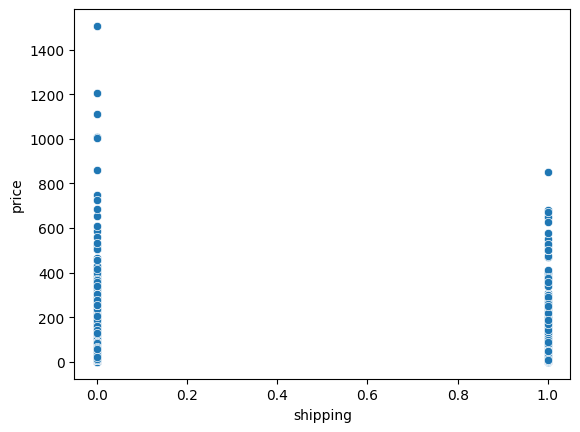

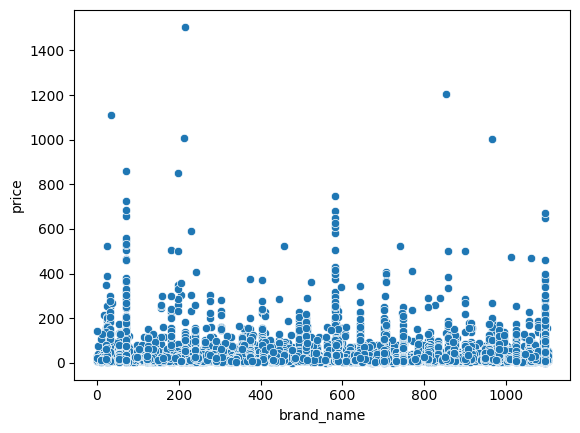

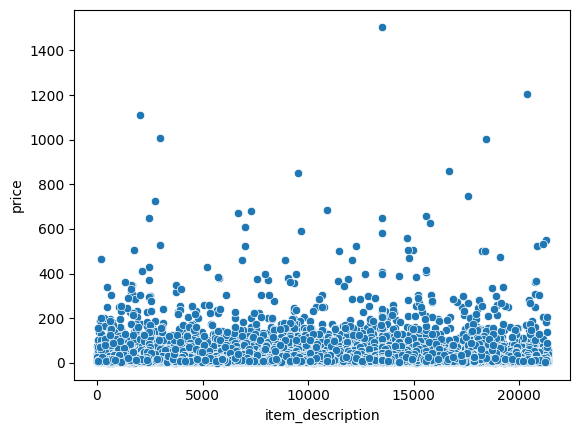

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of the target variable
sns.histplot(train['price'], kde=True)
plt.show()

# Visualize the relationship between the features and the target variable
sns.scatterplot(x='item_condition_id', y='price', data=train)
plt.show()

sns.scatterplot(x='name', y='price', data=train)
plt.show()

sns.scatterplot(x='category_name', y='price', data=train)
plt.show()

sns.scatterplot(x='shipping', y='price', data=train)
plt.show()

sns.scatterplot(x='brand_name', y='price', data=train)
plt.show()

sns.scatterplot(x='item_description', y='price', data=train)
plt.show()

In [24]:
X = train[[ 'name', 'item_condition_id', 'category_name', 'brand_name', 'shipping', 'item_description']]
y = train['price']

In [25]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [27]:
y_pred = model.predict(X_test)

In [32]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('RMSE:', rmse)

RMSE: 35.16264134188566


In [37]:
# Train Gradient Boosting model
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.1)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

# Train XGBoost model
import xgboost as xgb
xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# Train CatBoost model
from catboost import CatBoostRegressor
cat_model = CatBoostRegressor(n_estimators=100, max_depth=3, learning_rate=0.1)
cat_model.fit(X_train, y_train)
cat_pred = cat_model.predict(X_test)

# Train LightGBM model
import lightgbm as lgb
lgb_model = lgb.LGBMRegressor(n_estimators=100, max_depth=3, learning_rate=0.1)
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)

# Evaluate models using RMSE
from sklearn.metrics import mean_squared_error
print('Gradient Boosting RMSE:', np.sqrt(mean_squared_error(y_test, gb_pred)))
print('XGBoost RMSE:', np.sqrt(mean_squared_error(y_test, xgb_pred)))
print('CatBoost RMSE:', np.sqrt(mean_squared_error(y_test, cat_pred)))
print('LightGBM RMSE:', np.sqrt(mean_squared_error(y_test, lgb_pred)))

0:	learn: 42.9162295	total: 50.5ms	remaining: 5s
1:	learn: 42.7095952	total: 52.2ms	remaining: 2.56s
2:	learn: 42.5414971	total: 53.9ms	remaining: 1.74s
3:	learn: 42.4064905	total: 55.5ms	remaining: 1.33s
4:	learn: 42.2947202	total: 57.2ms	remaining: 1.08s
5:	learn: 42.1942003	total: 58.7ms	remaining: 920ms
6:	learn: 42.1112480	total: 60.5ms	remaining: 804ms
7:	learn: 42.0568371	total: 62.2ms	remaining: 716ms
8:	learn: 41.9689046	total: 63.8ms	remaining: 645ms
9:	learn: 41.8759606	total: 65.3ms	remaining: 588ms
10:	learn: 41.8224424	total: 66.9ms	remaining: 541ms
11:	learn: 41.7911077	total: 68.6ms	remaining: 503ms
12:	learn: 41.7016288	total: 70.2ms	remaining: 470ms
13:	learn: 41.6618171	total: 71.8ms	remaining: 441ms
14:	learn: 41.5709721	total: 73.4ms	remaining: 416ms
15:	learn: 41.5258504	total: 75.3ms	remaining: 396ms
16:	learn: 41.4516542	total: 77ms	remaining: 376ms
17:	learn: 41.4082395	total: 78.6ms	remaining: 358ms
18:	learn: 41.3253389	total: 80.2ms	remaining: 342ms
19:	lear

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

# Train a random forest regressor
rf_model = RandomForestRegressor(n_estimators=150, max_depth=15, random_state=42)
rf_model.fit(X_train, y_train)

# Combine the linear regression and random forest models into a voting regressor
voting_model = VotingRegressor([('linear', model), ('rf', rf_model),('cat',cat_model),('lgb',lgb_model),('xgb',xgb_model)])
voting_model.fit(X_train, y_train)

# Evaluate the voting regressor on the testing set
y_pred = voting_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('RMSE:', rmse)b


0:	learn: 42.9162295	total: 1.71ms	remaining: 170ms
1:	learn: 42.7095952	total: 3.11ms	remaining: 152ms
2:	learn: 42.5414971	total: 4.65ms	remaining: 150ms
3:	learn: 42.4064905	total: 6.22ms	remaining: 149ms
4:	learn: 42.2947202	total: 7.83ms	remaining: 149ms
5:	learn: 42.1942003	total: 9.4ms	remaining: 147ms
6:	learn: 42.1112480	total: 11ms	remaining: 146ms
7:	learn: 42.0568371	total: 12.7ms	remaining: 145ms
8:	learn: 41.9689046	total: 14.2ms	remaining: 143ms
9:	learn: 41.8759606	total: 15.7ms	remaining: 141ms
10:	learn: 41.8224424	total: 17.3ms	remaining: 140ms
11:	learn: 41.7911077	total: 18.9ms	remaining: 139ms
12:	learn: 41.7016288	total: 20.5ms	remaining: 137ms
13:	learn: 41.6618171	total: 22ms	remaining: 135ms
14:	learn: 41.5709721	total: 23.7ms	remaining: 134ms
15:	learn: 41.5258504	total: 26.4ms	remaining: 139ms
16:	learn: 41.4516542	total: 28.3ms	remaining: 138ms
17:	learn: 41.4082395	total: 30ms	remaining: 137ms
18:	learn: 41.3253389	total: 31.5ms	remaining: 134ms
19:	learn:

In [66]:
print(y_test,"-----", y_pred)

18682    15.0
423      41.0
4219     10.0
20416    13.0
3213     26.0
         ... 
11775    15.0
18281    31.0
11031    33.0
16264    10.0
6770     12.0
Name: price, Length: 4637, dtype: float64 ----- [25.23323256 44.4288808  12.59521403 ... 29.44231593 22.84351795
 19.58175703]


In [68]:
for col in categorical_columns:
    le = LabelEncoder()
    test[col] = le.fit_transform(test[col].astype(str))

In [69]:
X_test = test[[ 'name', 'item_condition_id', 'category_name', 'brand_name', 'shipping', 'item_description']]
y_pred = voting_model.predict(X_test)

In [70]:
y_pred

array([18.79506179, 18.23294549, 28.32688011, ..., 13.90143548,
       43.80229703, 31.84195103])

In [72]:
import pickle

# Save the best model as a pickle file
with open('Voting_model.pkl', 'wb') as file:
    pickle.dump(voting_model, file)
